# Examining Returns of Tesla Stock

This is an analysis of the performance of Tesla stock over the last three years. I did this analysis in July 2019 so it begins July 2016.

In [1]:
library(quantmod)
library(xts)
library(ggplot2)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
TSLA <- read.csv('TSLA.csv', header=TRUE)
TSLA$Date <- as.Date(TSLA$Date, format="%Y-%m-%d")
TSLA <- xts(TSLA[,2:7], order.by=TSLA[, 1])


In [3]:
#Find daily simple returns
TSLA.returns <- TSLA[, 4] #just the Close price
TSLA.returns$Returns <- Delt(TSLA.returns$Close)
options(digits=3)
TSLA.returns <- TSLA.returns[-1, 2]#drop first row, make Returns only column
TSLA.returns[c(1:3, nrow(TSLA.returns)), ]


             Returns
2016-07-12 -0.000578
2016-07-13 -0.009437
2016-07-14 -0.004494
2019-07-10  0.038512

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.


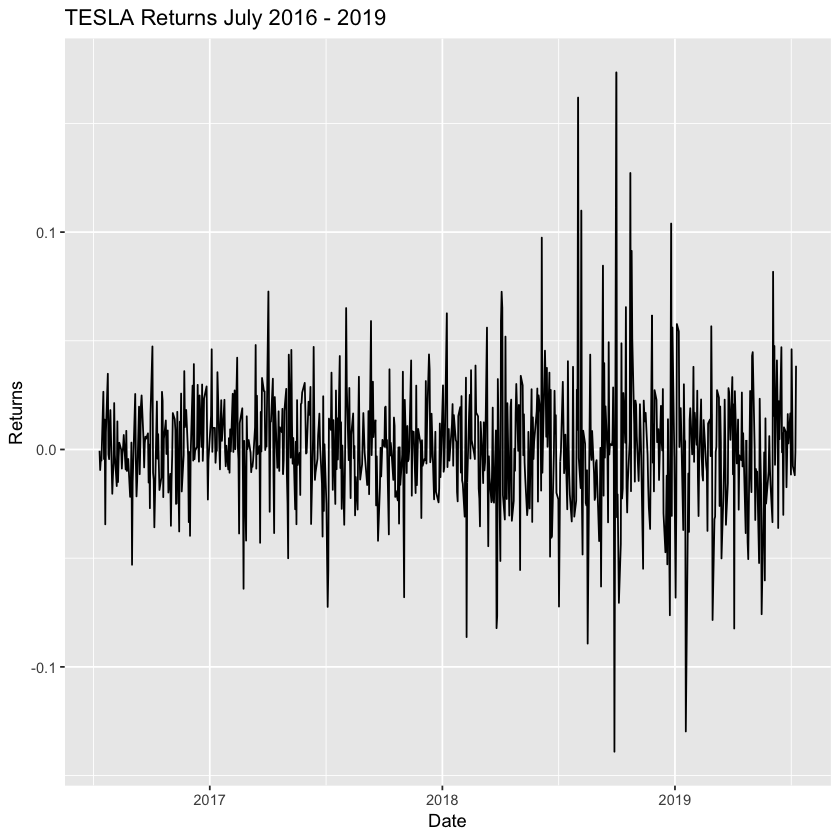

In [12]:
ggplot(data=TSLA.returns, aes(x=index(TSLA.returns), y=TSLA.returns$Returns))+
    geom_line() + labs(x="Date", y="Returns", title="TESLA Returns July 2016 - 2019")

In [12]:
#calculate log returns based on adjusted closing price
TSLA.logreturns <- TSLA[, 5]
TSLA.logreturns$log.return <- diff(log(TSLA.logreturns$Adj.Close))
options(digits=3)
TSLA.logreturns <- TSLA.logreturns[-1, 2]
head(TSLA.logreturns)

           log.return
2016-07-12  -0.000579
2016-07-13  -0.009482
2016-07-14  -0.004504
2016-07-15  -0.005114
2016-07-18   0.026197
2016-07-19  -0.004385

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.


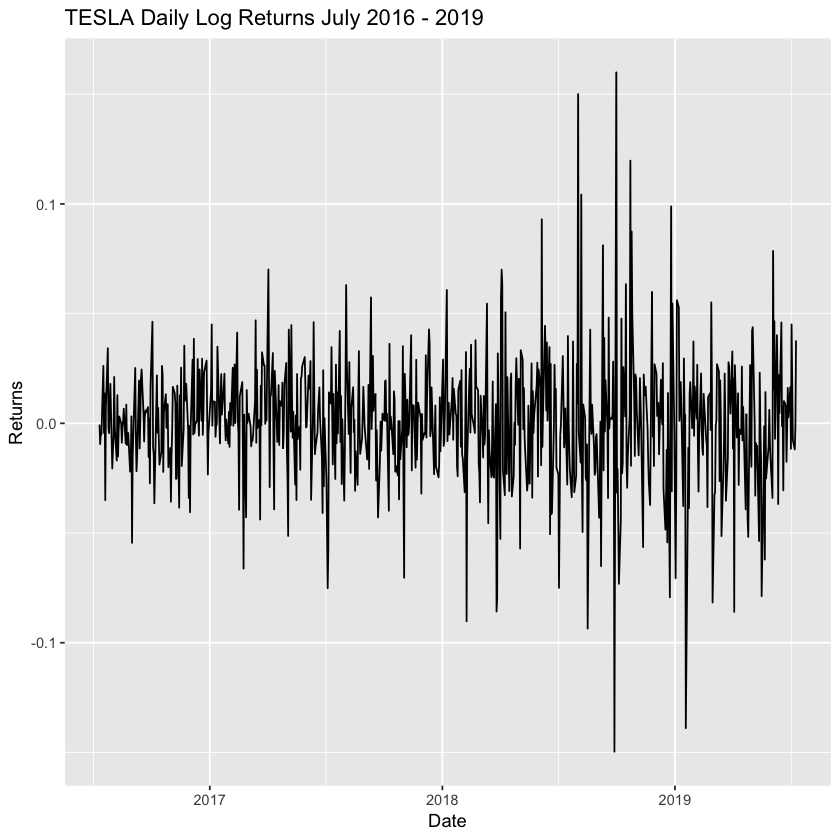

In [14]:
ggplot(data=TSLA.logreturns, aes(x=index(TSLA.logreturns), y=TSLA.logreturns$log.return))+
    geom_line() + labs(x="Date", y="Returns", title="TESLA Daily Log Returns July 2016 - 2019")

In [16]:
#Look at cumulative log returns
TSLA.cumlogreturns <- TSLA[, 5]
TSLA.cumlogreturns$log.return <- diff(log(TSLA.cumlogreturns$Adj.Close))
options(digits=3)
TSLA.cumlogreturns <- TSLA.cumlogreturns[, 2]
TSLA.cumlogreturns[1, 1] <- 0
head(TSLA.cumlogreturns)

           log.return
2016-07-11   0.000000
2016-07-12  -0.000579
2016-07-13  -0.009482
2016-07-14  -0.004504
2016-07-15  -0.005114
2016-07-18   0.026197

In [17]:
#Find the cumulative log return for last three years and convert to simple return
cum.logreturn <- sum(TSLA.cumlogreturns$log.return)
cumret <- exp(cum.logreturn) - 1
cumret

[1] 0.0629

Looks like if you had invested in Tesla back in July 2016, your return today would 0.063. 

In [22]:
#Finding Total Return
TSLA.returns[1, 1] <- 0
TSLA.returns$Gross.Return <- 1 + TSLA.returns$Returns
TSLA.returns$CumTotal <- cumprod(TSLA.returns$Gross.Return)

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.


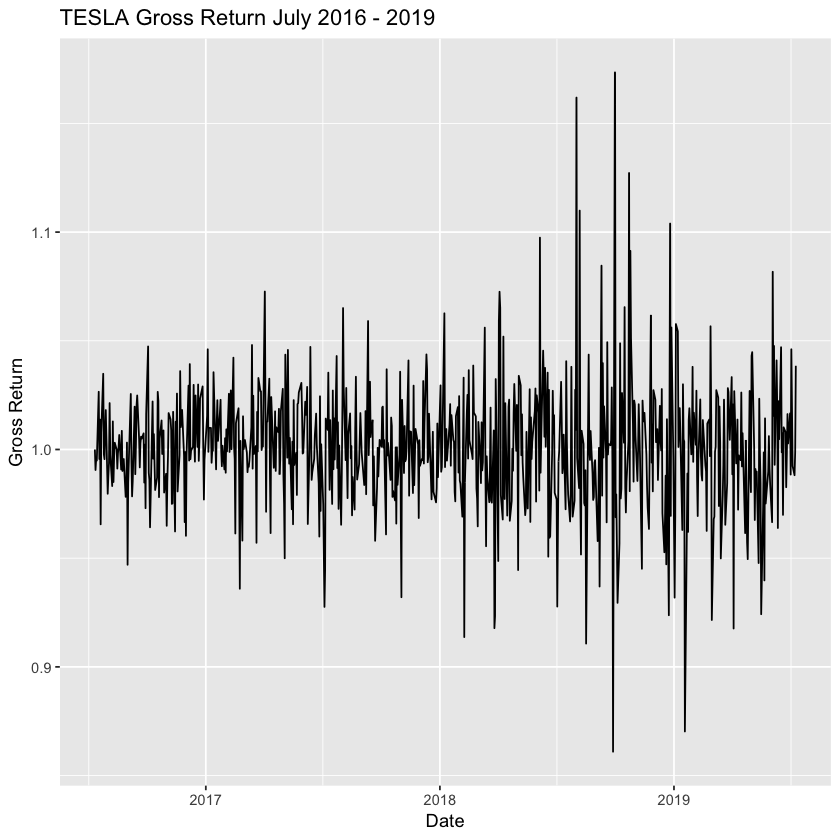

In [24]:
ggplot(data=TSLA.returns, aes(x=index(TSLA.returns), y=TSLA.returns$Gross.Return))+
    geom_line() + labs(x="Date", y="Gross Return", title="TESLA Gross Return July 2016 - 2019")

Tesla has been a highly volatile stock with modest return, this is not something I would advise the average investor to look at.